In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import scipy.optimize as opt
import scipy.stats
import generate_bus_ms
import generate_pvt_ms
import generate_wb_ms

In [2]:
###add prob values if needed later and update variable names
#plot_df_pvt = pd.read_csv("./PvtOccupancyProb.csv")
#plot_df_bus = pd.read_csv("./BusOccProb.csv")
#plot_df_wb =  pd.read_csv("./BusOccProb.csv")

# plot_df_wb_MS_freq = pd.read_csv("./WB_MS_freq.csv") 
# plot_df_pvt_MS_freq = pd.read_csv("./PVT_MS_freq.csv") 
# plot_df_bus_MS_freq = pd.read_csv("./BUS_MS_freq.csv")

ms_pvt_gen = generate_pvt_ms.Generator("PVT_MS_freq.csv")
ms_wb_gen = generate_wb_ms.Generator("WB_MS_freq.csv")
ms_bus_gen = generate_bus_ms.Generator("BUS_MS_freq.csv")

(array([-0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,
         0.035]),
 <a list of 9 Text major ticklabel objects>)

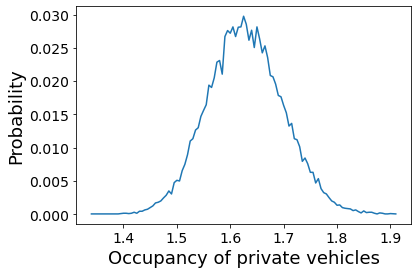

In [4]:
###update this block with variable names if there is a need to plot the histogram/bar/line plot

# #View initial distribution
# fig = plt.figure()
# ax = plt.axes()
# x_ax = plot_df_pvt['pvt_occ_means_vec']
# y_ax = plot_df_pvt['Freq']


# #x = np.linspace(0, 10, 1000)
# #ax.bar(plot_df['pvt_occ_means_vec'],plot_df['Freq']) ##i dont know why this refuses to plot a decent bar chart!!!!!!!
# plt.plot(x_ax,y_ax)
# plt.xlabel('Occupancy of private vehicles',size=18)
# plt.ylabel('Probability',size=18)
# plt.xticks(size=14)
# plt.yticks(size=14)

(array([0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 , 0.055, 0.06 , 0.065]),
 <a list of 9 Text major ticklabel objects>)

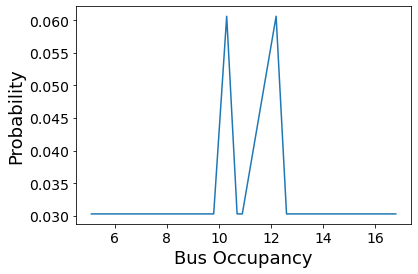

In [7]:
###update this block with variable names if there is a need to plot the histogram/bar/line plot

# fig = plt.figure()
# ax = plt.axes()
# x_ax = plot_df_bus['bus_main_data_mod']
# y_ax = plot_df_bus['Freq']


# #x = np.linspace(0, 10, 1000)
# #ax.bar(plot_df['pvt_occ_means_vec'],plot_df['Freq']) ##i dont know why this refuses to plot a decent bar chart!!!!!!!
# plt.plot(x_ax,y_ax)
# plt.xlabel('Bus Occupancy',size=18)
# plt.ylabel('Probability',size=18)
# plt.xticks(size=14)
# plt.yticks(size=14)


In [4]:
# #Create series with values for walk+bike 
# vals_wb_MS= []
# for i,row in plot_df_wb_MS_freq.iterrows():
#     freq = int(row['Freq'])
#     #print(freq)
#     for num in range(0,freq):
#         vals_wb_MS.append(row['non_motorized_vec'])
# vals_wb_MS = pd.Series(vals_wb_MS)
# print(vals_wb_MS)

# #Create series with values for pvt vehicle PMT 
# vals_pvt_MS= []
# for i,row in plot_df_pvt_MS_freq.iterrows():
#     freq = int(row['Freq'])
#     #print(freq)
#     for num in range(0,freq):
#         vals_pvt_MS.append(row['private_vec'])
# vals_pvt_MS = pd.Series(vals_pvt_MS)

# #Create series with values for bus PMT 
# vals_bus_MS= []
# for i,row in plot_df_bus_MS_freq.iterrows():
#     freq = int(row['Freq'])
#     #print(freq)
#     for num in range(0,freq):
#         vals_bus_MS.append(row['bus_vec'])
# vals_bus_MS = pd.Series(vals_bus_MS)

0        0.070
1        0.095
2        0.095
3        0.095
4        0.095
         ...  
19995    0.280
19996    0.285
19997    0.285
19998    0.295
19999    0.295
Length: 20000, dtype: float64


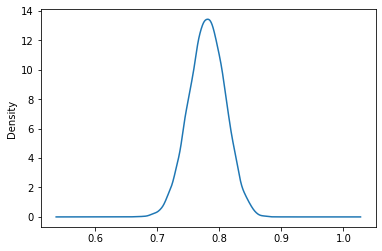

In [3]:
#KDE plot documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html

ms_pvt_gen.plot_df_pvt_ms_series.plot.kde()

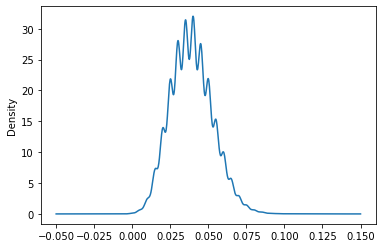

In [4]:
#KDE plot documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html

ms_bus_gen.plot_df_bus_ms_series.plot.kde()

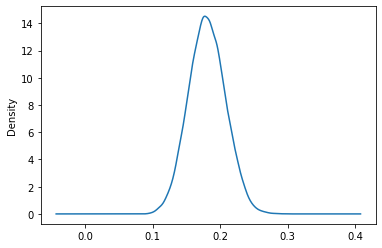

In [5]:
#KDE plot documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html

ms_wb_gen.plot_df_wb_ms_series.plot.kde()

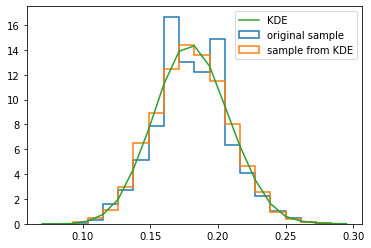

In [6]:
#Code from here: https://stackoverflow.com/questions/35434363/python-generate-random-values-from-empirical-distribution

sample_pdf_wb_MS = ms_wb_gen.plot_df_wb_ms_pdf

# Sample new datapoints from the KDE
new_sample_data_wb_MS = sample_pdf_wb_MS.resample(10000).T[:,0]

# Histogram of initial empirical sample
cnts, bins, p = plt.hist(ms_wb_gen.plot_df_wb_ms_series, label='original sample', bins=20,
                         histtype='step', linewidth=1.5, density=True)

# Histogram of datapoints sampled from KDE
plt.hist(new_sample_data_wb_MS, label='sample from KDE', bins=bins,
         histtype='step', linewidth=1.5, density=True)

# Visualize the kde itself
y_kde = sample_pdf_wb_MS(bins)
plt.plot(bins, y_kde, label='KDE')
plt.legend()
plt.show(block=False)



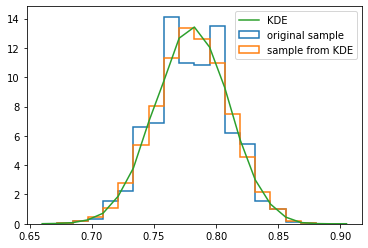

In [7]:
#Code from here: https://stackoverflow.com/questions/35434363/python-generate-random-values-from-empirical-distribution

sample_pdf_pvt_MS = ms_pvt_gen.plot_df_pvt_ms_pdf

# Sample new datapoints from the KDE
new_sample_data_pvt_MS = sample_pdf_pvt_MS.resample(10000).T[:,0]

# Histogram of initial empirical sample
cnts, bins, p = plt.hist(ms_pvt_gen.plot_df_pvt_ms_series, label='original sample', bins=20,
                         histtype='step', linewidth=1.5, density=True)

# Histogram of datapoints sampled from KDE
plt.hist(new_sample_data_pvt_MS, label='sample from KDE', bins=bins,
         histtype='step', linewidth=1.5, density=True)

# Visualize the kde itself
y_kde = sample_pdf_pvt_MS(bins)
plt.plot(bins, y_kde, label='KDE')
plt.legend()
plt.show(block=False)

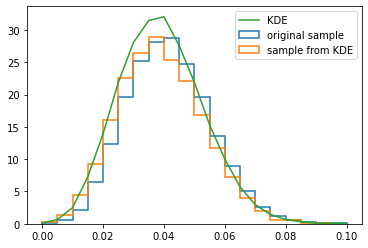

In [8]:
#Code from here: https://stackoverflow.com/questions/35434363/python-generate-random-values-from-empirical-distribution

sample_pdf_bus_MS = ms_bus_gen.plot_df_bus_ms_pdf

# Sample new datapoints from the KDE
new_sample_data_bus_MS = sample_pdf_bus_MS.resample(10000).T[:,0]

# Histogram of initial empirical sample
cnts, bins, p = plt.hist(ms_bus_gen.plot_df_bus_ms_series, label='original sample', bins=20,
                         histtype='step', linewidth=1.5, density=True)

# Histogram of datapoints sampled from KDE
plt.hist(new_sample_data_bus_MS, label='sample from KDE', bins=bins,
         histtype='step', linewidth=1.5, density=True)

# Visualize the kde itself
y_kde = sample_pdf_bus_MS(bins)
plt.plot(bins, y_kde, label='KDE')
plt.legend()
plt.show(block=False)

In [ ]:
#To generate 100 samples from MPG distribution:sample_pdf_wb_MS.resample(100)
sample_pdf_wb_MS.resample(100)

In [ ]:
#To generate 100 samples from MPG distribution:
sample_pdf_pvt_MS.resample(100)

In [13]:
#To generate 100 samples from MPG distribution:
sample_pdf_bus_MS.resample(100)

array([[0.03652044, 0.03081915, 0.05191774, 0.02874383, 0.03599186,
        0.05285104, 0.04151671, 0.03888631, 0.04555922, 0.04351004,
        0.04226722, 0.04332809, 0.03192041, 0.05307097, 0.04909728,
        0.03316269, 0.03295454, 0.05610542, 0.03287485, 0.0293335 ,
        0.03241651, 0.06059757, 0.02464981, 0.0366262 , 0.05065281,
        0.0489207 , 0.04454408, 0.03811134, 0.02296632, 0.05442858,
        0.01972113, 0.03789626, 0.02400133, 0.02312225, 0.03468309,
        0.02559396, 0.02582135, 0.03919918, 0.05935662, 0.02056732,
        0.01925972, 0.01409484, 0.03353907, 0.0266061 , 0.04938893,
        0.06069758, 0.03752096, 0.06459469, 0.04476805, 0.04876394,
        0.04290673, 0.05466286, 0.03738313, 0.03667955, 0.01987627,
        0.0362373 , 0.05571619, 0.06651815, 0.04251973, 0.0351991 ,
        0.0364836 , 0.03245136, 0.01883919, 0.04814271, 0.04543171,
        0.04055866, 0.03642576, 0.05726012, 0.04715606, 0.01048859,
        0.0266469 , 0.03338628, 0.02270046, 0.04